# SVM Lineal binario para separar las flores de iris en setosa y no setosa

$$\frac{1}{n}\sum_{i=1}^n \max(0,1-y_i(Ax_i-b))+\alpha||A||^2$$

- $A$: es el vector de las pendientes en cada variable 
- $b$: es la ordenada en el origen (intercept)
- $x=(x_1,x_2,\cdots, x_n)$ es el vector de datos
- $y_i$ es la clase del objeto (-1 o 1)
- $\alpha$: coeficiente de regularización y suavizado de la separación

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [172]:
import tensorflow as tf
session = tf.Session()

## se cargan los datos

In [173]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

## se divide el dataset en conjunto de entrenamiento y conjunto de test

In [174]:
train_index = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_index = np.array(list(set(range(len(x_vals)))-set(train_index)))

x_vals_train = x_vals[train_index]
y_vals_train = y_vals[train_index]

x_vals_test = x_vals[test_index]
y_vals_test = y_vals[test_index]

## se declaran los placeholders

In [175]:
x_data = tf.placeholder(shape=[None,2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

## se declaran las variables

In [176]:
A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

## creacion del modelo
    - y = Ax - b

In [177]:
prediccion = tf.subtract(tf.matmul(x_data, A), b)

## se define la funcion de perdida

In [178]:
clasification_termino = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(prediccion, y_target))))
alpha = tf.constant([0.1])
l2_norm = tf.reduce_sum(tf.square(A))
loss = tf.add(clasification_termino, tf.multiply(alpha, l2_norm))

## funcion de clasificacion del modelo

In [179]:
clasificacion_del_modelo = tf.sign(prediccion) ##cuando la prediccion sea un numero negativo, la funcion "sign" lo convertira a -1; y cuando la prediccion sea un numero positivo la funcion "sign" lo convertira a 1
accuracy = tf.reduce_mean(tf.cast(tf.equal(clasificacion_del_modelo, y_target), tf.float32)) ## saca el porcentaje de aciertos con respecto al total de los datos

## se define el batch_size

In [180]:
batch_size = 100

## se define el optimizador con propagacion hacia atras

In [181]:
optimizador = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = optimizador.minimize(loss)

## inicializar las variables

In [182]:
init = tf.global_variables_initializer()
session.run(init)

## entrenamiento del modelo

In [183]:
loss_vect = []
train_acc = []
test_acc = []

for i in range(3000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    train_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp = session.run(accuracy, feed_dict= {x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+", b = "+str(session.run(b))+ ", Loss = "+str(temp_loss))

Paso #100, A = [[-0.45593917]
 [ 0.76773345]], b = [[-0.3989672]], Loss = [0.78566074]
Paso #200, A = [[-0.31297898]
 [ 0.26912913]], b = [[-0.4592671]], Loss = [0.76631355]
Paso #300, A = [[-0.2329816 ]
 [-0.08544067]], b = [[-0.50116706]], Loss = [0.49575636]
Paso #400, A = [[-0.17179058]
 [-0.32653388]], b = [[-0.5431669]], Loss = [0.46110323]
Paso #500, A = [[-0.1289354]
 [-0.5199187]], b = [[-0.586167]], Loss = [0.425257]
Paso #600, A = [[-0.11469166]
 [-0.6710814 ]], b = [[-0.6247667]], Loss = [0.3402609]
Paso #700, A = [[-0.08183544]
 [-0.7878975 ]], b = [[-0.6709669]], Loss = [0.362863]
Paso #800, A = [[-0.0602684]
 [-0.8847718]], b = [[-0.7151668]], Loss = [0.37710512]
Paso #900, A = [[-0.05241114]
 [-0.97026056]], b = [[-0.7592666]], Loss = [0.38926515]
Paso #1000, A = [[-0.05401907]
 [-1.0372865 ]], b = [[-0.80236655]], Loss = [0.36050954]
Paso #1100, A = [[-0.04087676]
 [-1.0867038 ]], b = [[-0.8473664]], Loss = [0.36809728]
Paso #1200, A = [[-0.03563198]
 [-1.1267186 ]], b

In [184]:
## se obtienen los valores de "A" y de "b"
[[a1],[a2]] = session.run(A)
[[b]] = session.run(b)

slope = -a2/a1
y_intercept = b/a1

In [185]:
x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope*i + y_intercept)
    
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i]==1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i]==1]
no_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i]==-1]
no_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i]==-1] 

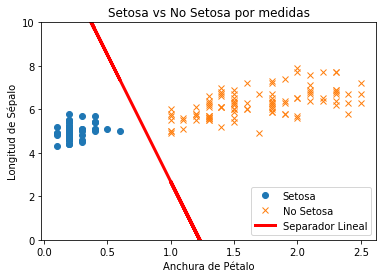

In [186]:
plt.plot(setosa_x, setosa_y, 'o', label = "Setosa")
plt.plot(no_setosa_x, no_setosa_y, 'x', label="No Setosa")
plt.plot(x1_vals, best_fit, 'r-', label = "Separador Lineal", linewidth=3)
plt.ylim([0,10])
plt.legend(loc="lower right")
plt.xlabel("Anchura de Pétalo")
plt.ylabel("Longitud de Sépalo")
plt.title("Setosa vs No Setosa por medidas")
plt.show()

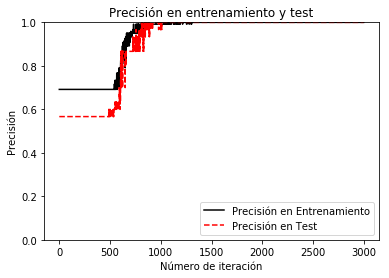

In [187]:
plt.plot(train_acc, 'k-', label = "Precisión en Entrenamiento")
plt.plot(test_acc, 'r--', label = "Precisión en Test")
plt.title("Precisión en entrenamiento y test")
plt.xlabel("Número de iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.ylim([0,1])
plt.show()

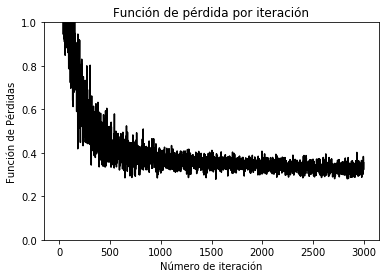

In [188]:
plt.plot(loss_vect, 'k-')
plt.title("Función de pérdida por iteración")
plt.xlabel("Número de iteración")
plt.ylabel("Función de Pérdidas")
plt.ylim([0,1])
plt.show()